### Import Libraries

In [44]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

### Data Preparation

In [2]:
DATA_DIR_PATH = os.path.join(os.getcwd(), 'Teeth_Dataset')
TRAIN_DATA_PATH = os.path.join(DATA_DIR_PATH, 'Training')
VALID_DATA_PATH = os.path.join(DATA_DIR_PATH, 'Validation')
TEST_DATA_PATH = os.path.join(DATA_DIR_PATH, 'Testing')

In [3]:
os.listdir(TRAIN_DATA_PATH)

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

In [4]:
Train_classes_path =  [os.path.join(TRAIN_DATA_PATH,f) for f in os.listdir(TRAIN_DATA_PATH)]
Valid_classes_path =  [os.path.join(VALID_DATA_PATH,f) for f in os.listdir(TRAIN_DATA_PATH)]
Test_classes_path =  [os.path.join(TEST_DATA_PATH,f) for f in os.listdir(TRAIN_DATA_PATH)]
Train_classes_path

['d:\\Cellula Tech CV intern\\First session\\Teeth Project\\Teeth_Dataset\\Training\\CaS',
 'd:\\Cellula Tech CV intern\\First session\\Teeth Project\\Teeth_Dataset\\Training\\CoS',
 'd:\\Cellula Tech CV intern\\First session\\Teeth Project\\Teeth_Dataset\\Training\\Gum',
 'd:\\Cellula Tech CV intern\\First session\\Teeth Project\\Teeth_Dataset\\Training\\MC',
 'd:\\Cellula Tech CV intern\\First session\\Teeth Project\\Teeth_Dataset\\Training\\OC',
 'd:\\Cellula Tech CV intern\\First session\\Teeth Project\\Teeth_Dataset\\Training\\OLP',
 'd:\\Cellula Tech CV intern\\First session\\Teeth Project\\Teeth_Dataset\\Training\\OT']

In [5]:
X_train = []
y_train = []
for path in Train_classes_path:
    for file in os.listdir(path):
        
        img_path = os.path.join(path, file)
        img = plt.imread(img_path)
        
        resized_image = cv2.resize(img, (100, 100))
        X_train.append(resized_image)
        y_train.append(os.path.dirname(img_path).split('\\')[-1])
                

In [6]:
X_test = []
y_test = []
for path in Test_classes_path:
    for file in os.listdir(path):
        
        img_path = os.path.join(path, file)
        img = plt.imread(img_path)
        
        resized_image = cv2.resize(img, (100, 100))
        X_test.append(resized_image)
        y_test.append(os.path.dirname(img_path).split('\\')[-1])
                

In [7]:
X_valid = []
y_valid = []
for path in Valid_classes_path:
    for file in os.listdir(path):
        
        img_path = os.path.join(path, file)
        img = plt.imread(img_path)
        
        resized_image = cv2.resize(img, (100, 100))
        X_valid.append(resized_image)
        y_valid.append(os.path.dirname(img_path).split('\\')[-1])
                

In [8]:
# i found that there is an image with a different shape 
counter_dict ={
    1: "X_train",
    2: "X_test",
    3: "X_valid"
}
counter = 0
for arr in [X_train, X_test, X_valid]:
    counter += 1
    for idx, img in enumerate(arr):
        if img.shape != (100, 100, 3):
            print(f"the image of index {idx} has shape {img.shape} in {counter_dict[counter]}")

the image of index 974 has shape (100, 100, 4) in X_train
the image of index 321 has shape (100, 100, 4) in X_valid


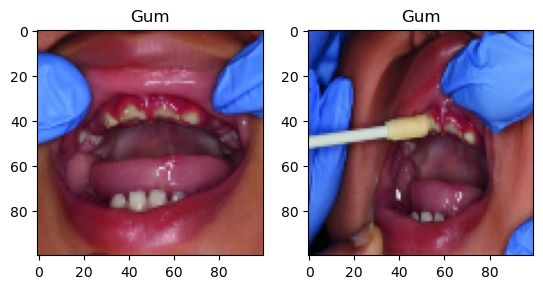

In [9]:
plt.subplot(1, 2, 1)
plt.title(y_valid[321])
plt.imshow(X_valid[321])
plt.subplot(1, 2, 2)
plt.title(y_train[974])
plt.imshow(X_train[974])

In [10]:
del X_train[974]
del y_train[974]

del X_valid[321]
del y_valid[321]

In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [12]:
X_train.shape, y_train.shape

((3086, 100, 100, 3), (3086,))

In [13]:
X_test.shape, y_test.shape

((1028, 100, 100, 3), (1028,))

In [14]:
X_valid.shape, y_valid.shape


((1027, 100, 100, 3), (1027,))

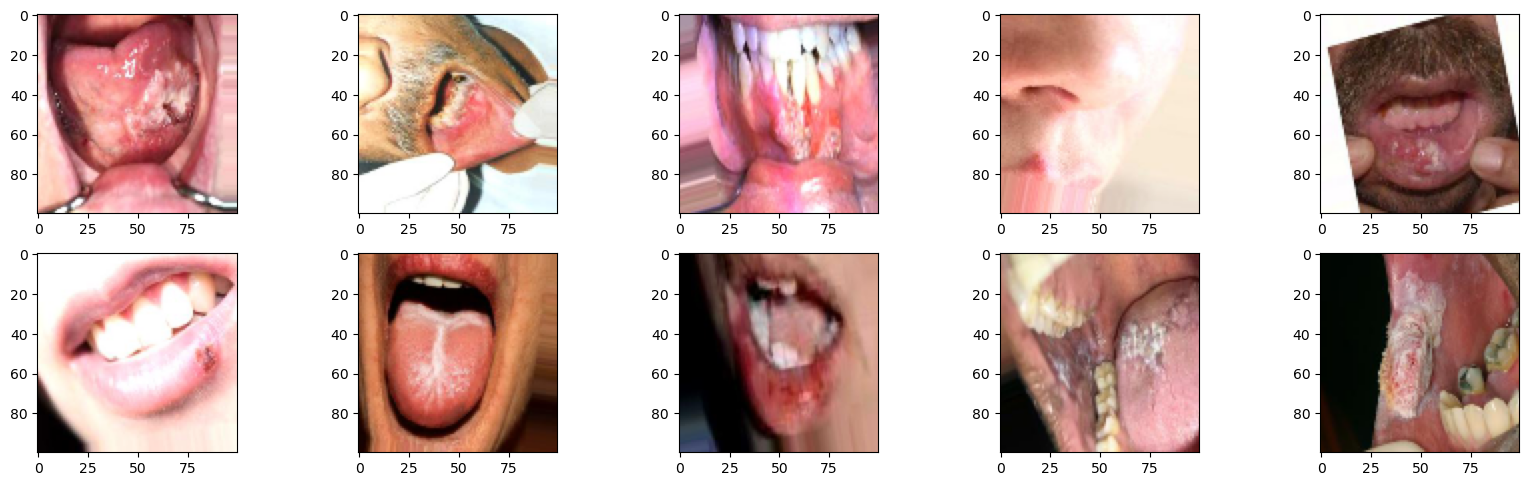

In [15]:
num_imgs = 10
num_rows = int(np.floor(num_imgs/2))
num_cols = int(np.ceil(num_imgs/2))

plt.figure(figsize=(20, 15))
for i in range(0, num_imgs):
    idx = np.random.randint(0, X_train.shape[0])
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    

In [16]:
def train_data_prep(X_train):
    X_train = tf.cast(X_train, tf.float32) / 255.
    # X_train, y_train = shuffle(X_train, y_train, random_state=42)
    return X_train

In [17]:
def test_data_prep(X_test):
    
    return tf.cast(X_test, tf.float32) / 255.

In [18]:
X_train_data_prepared = train_data_prep(X_train)
X_test_data_prepared = test_data_prep(X_test)
X_val_data_prepared = test_data_prep(X_valid)

In [19]:
y_train

array(['CaS', 'CaS', 'CaS', ..., 'OT', 'OT', 'OT'], dtype='<U3')

In [20]:
y_test

array(['CaS', 'CaS', 'CaS', ..., 'OT', 'OT', 'OT'], dtype='<U3')

In [21]:
y_valid

array(['CaS', 'CaS', 'CaS', ..., 'OT', 'OT', 'OT'], dtype='<U3')

In [22]:
ohe = OneHotEncoder(sparse=False)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)

y_train_ohe = ohe.fit_transform(y_train)
y_test_ohe = ohe.transform(y_test) 
y_valid_ohe = ohe.transform(y_valid) 

c:\Users\lenovo\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
y_train_ohe.shape

(3086, 7)

In [24]:
batch_size = 32
train_size = len(X_train)
val_size = len(X_val_data_prepared)

train_steps = int(train_size / batch_size)
val_steps = int(val_size / batch_size)

In [25]:
input_shape = X_train[0].shape
model = keras.Sequential([
  keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Flatten(),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(7, activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_history = model.fit(X_train_data_prepared,
                          y_train_ohe,
                          epochs=10,
                          batch_size=32,
                          validation_data=(X_val_data_prepared, y_valid_ohe),
                        #   steps_per_epoch=train_steps,
                        #   validation_steps=val_steps,
                          shuffle=True)

Epoch 1/10
97/97 [==============================] - 18s 178ms/step - loss: 1.8149 - accuracy: 0.2771 - val_loss: 1.6217 - val_accuracy: 0.3476
Epoch 2/10
97/97 [==============================] - 17s 174ms/step - loss: 1.5496 - accuracy: 0.4099 - val_loss: 1.4430 - val_accuracy: 0.4703
Epoch 3/10
97/97 [==============================] - 17s 175ms/step - loss: 1.2505 - accuracy: 0.5428 - val_loss: 1.3010 - val_accuracy: 0.5122
Epoch 4/10
97/97 [==============================] - 19s 191ms/step - loss: 0.9899 - accuracy: 0.6374 - val_loss: 1.1017 - val_accuracy: 0.5959
Epoch 5/10
97/97 [==============================] - 18s 184ms/step - loss: 0.7625 - accuracy: 0.7272 - val_loss: 0.9897 - val_accuracy: 0.6407
Epoch 6/10
97/97 [==============================] - 17s 178ms/step - loss: 0.6052 - accuracy: 0.7852 - val_loss: 1.0794 - val_accuracy: 0.6193
Epoch 7/10
97/97 [==============================] - 17s 175ms/step - loss: 0.4340 - accuracy: 0.8477 - val_loss: 0.9725 - val_accuracy: 0.6884

In [ ]:
loss_acc_df = pd.DataFrame(model_history.history)
loss_acc_df.plot()

- it seems like the model overfitted the data,so we are going to add more dropout layers 

In [59]:
input_shape = X_train[0].shape
model_2 = keras.Sequential([
  keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(7, activation='softmax')
])

In [60]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_history = model_2.fit(X_train_data_prepared,
                          y_train_ohe,
                          epochs=13,
                          batch_size=32,
                          validation_data=(X_val_data_prepared, y_valid_ohe),
                        #   steps_per_epoch=train_steps,
                        #   validation_steps=val_steps,
                          # shuffle=True
                          )

Epoch 1/13
97/97 [==============================] - 19s 188ms/step - loss: 1.9357 - accuracy: 0.1782 - val_loss: 1.8535 - val_accuracy: 0.2434
Epoch 2/13
97/97 [==============================] - 17s 173ms/step - loss: 1.7935 - accuracy: 0.2874 - val_loss: 1.6378 - val_accuracy: 0.3905
Epoch 3/13
97/97 [==============================] - 17s 173ms/step - loss: 1.5525 - accuracy: 0.3911 - val_loss: 1.3526 - val_accuracy: 0.5044
Epoch 4/13
97/97 [==============================] - 18s 182ms/step - loss: 1.3441 - accuracy: 0.4867 - val_loss: 1.3136 - val_accuracy: 0.5112
Epoch 5/13
97/97 [==============================] - 18s 185ms/step - loss: 1.1496 - accuracy: 0.5680 - val_loss: 1.0941 - val_accuracy: 0.6008
Epoch 6/13
97/97 [==============================] - 21s 221ms/step - loss: 0.9757 - accuracy: 0.6487 - val_loss: 1.0728 - val_accuracy: 0.6095
Epoch 7/13
97/97 [==============================] - 19s 198ms/step - loss: 0.8462 - accuracy: 0.6931 - val_loss: 1.1290 - val_accuracy: 0.6125

<Axes: >

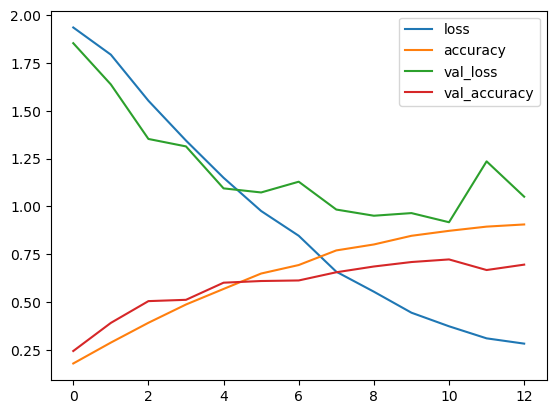

In [61]:
loss_acc_df = pd.DataFrame(model_history.history)
loss_acc_df.plot()

In [62]:
model_2.evaluate(X_test_data_prepared, y_test_ohe)

33/33 [==============================] - 1s 32ms/step - loss: 0.9878 - accuracy: 0.7383


[0.9877631664276123, 0.7383268475532532]